In [65]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [78]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
target = train_df['revenue']

In [4]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [6]:
train_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [13]:
train_df['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
da       5
fa       5
ro       4
hu       3
tr       3
fi       2
ml       2
pl       2
te       2
no       2
el       1
ur       1
ar       1
cs       1
nb       1
mr       1
bn       1
sr       1
he       1
vi       1
id       1
Name: original_language, dtype: int64

In [14]:
train_df['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [15]:
train_df['runtime'] = train_df['runtime'].fillna(0)

In [18]:
train_df['homepage'] = train_df['homepage'].fillna(0)
train_df['homepage'] = train_df['homepage'].apply(lambda x: 0 if x==0 else 1)

In [19]:
train_df['homepage'].value_counts()

0    2054
1     946
Name: homepage, dtype: int64

In [20]:
other = ('zh','de','ta','sv','pt','nl','fa','da','ro','tr','hu','te','pl','fi','no','ml','el','id','bn','sr','ar','mr','he','nb','ur','vi','cs')

In [21]:
train_df['original_language'] = train_df['original_language'].apply(lambda x: 'other' if x in other else x)

In [22]:
del train_df['imdb_id']
#del train_df['revenue']
del train_df['poster_path']

In [23]:
le = LabelEncoder()

In [24]:
train_df['status'] = le.fit_transform(train_df['status'])

In [25]:
train_df['release_date'] = pd.to_datetime(train_df['release_date'])
train_df['release_year'] = train_df['release_date'].apply(lambda x: x.year)
train_df['release_month'] = train_df['release_date'].apply(lambda x: x.month)
train_df['release_day'] = train_df['release_date'].apply(lambda x: x.dayofweek)

In [26]:
train_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN,NaN,NaN
budget,14000000,40000000,3300000,1200000,0
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
homepage,0,0,1,1,0
original_language,en,en,en,hi,ko
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,마린보이
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,Marine Boy is the story of a former national s...
popularity,6.57539,8.24889,64.3,3.17494,1.14807
production_companies,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'name': 'Bold Films', 'id': 2266}, {'name': ...",NaN,NaN


In [32]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']


def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

In [33]:
train_df = text_to_dict(train_df)
#test_df = text_to_dict(test_df)

In [34]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",0,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,4
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,4
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",1,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,4
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",1,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,{},...,0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,4
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,{},...,0,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,3


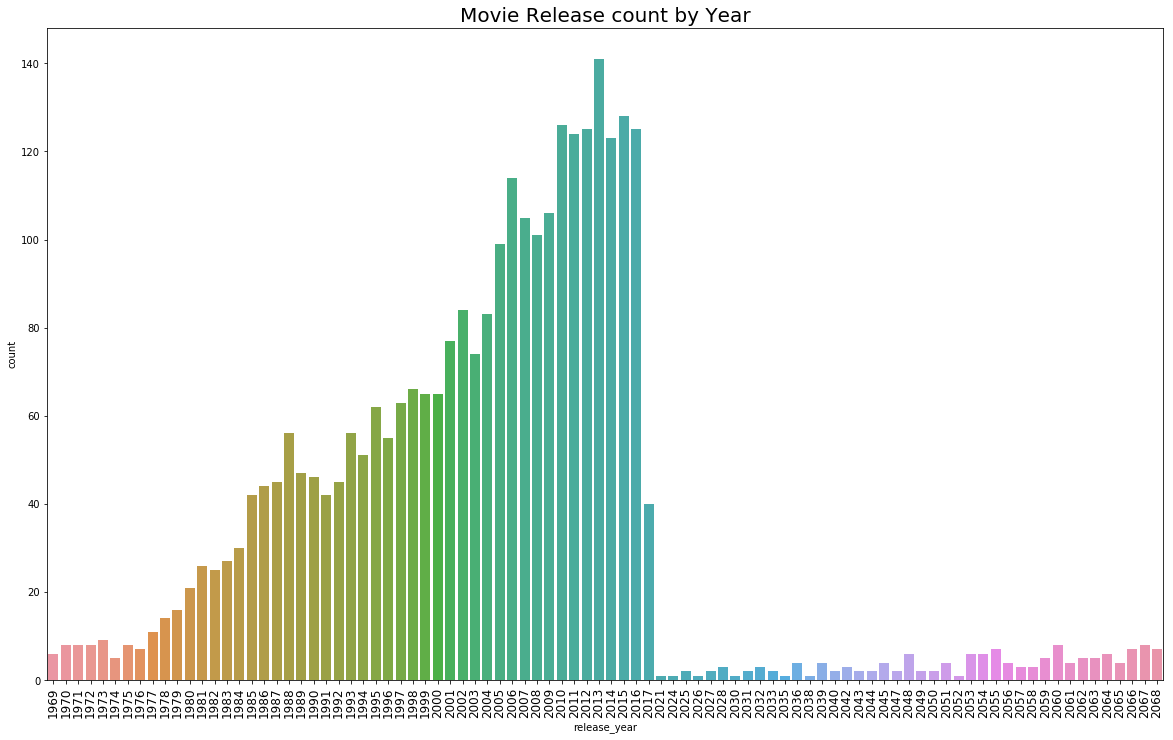

In [37]:
plt.figure(figsize=(20,12))
sns.countplot(train_df['release_year'].sort_values())
plt.title("Movie Release count by Year", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

In [41]:
train_df['release_year'] = train_df['release_year'].apply(lambda x: 2018 if x > 2017 else x)

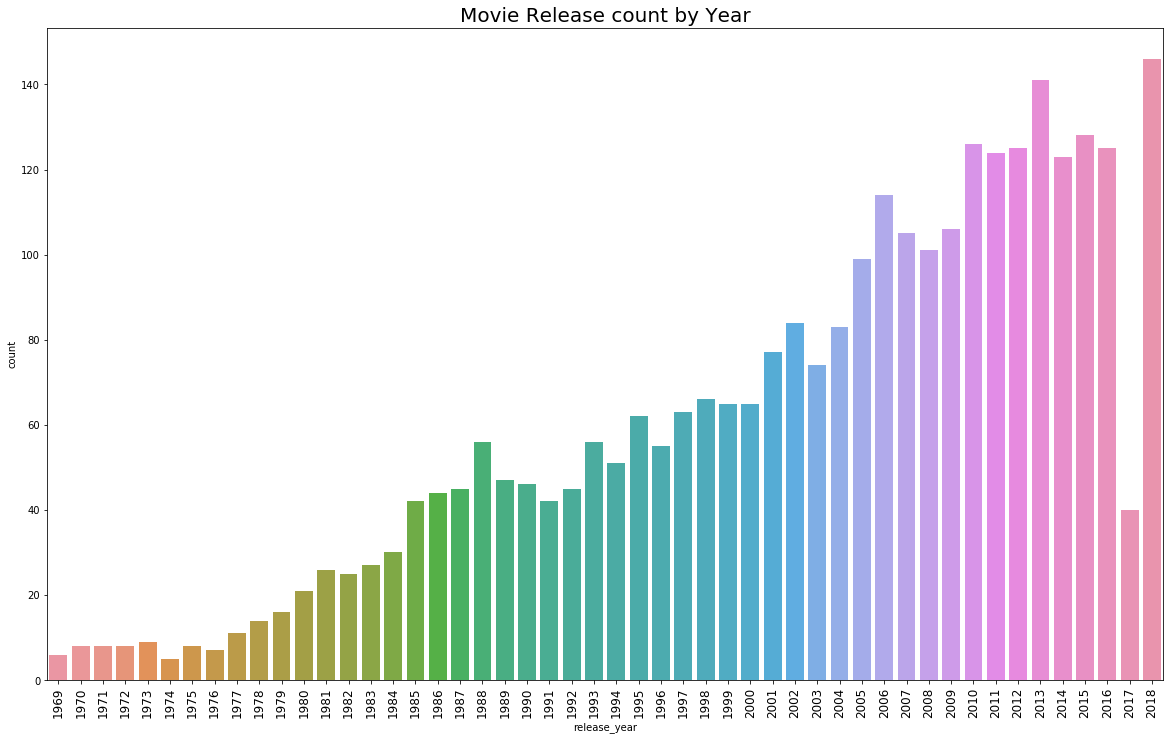

In [42]:
plt.figure(figsize=(20,12))
sns.countplot(train_df['release_year'].sort_values())
plt.title("Movie Release count by Year", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

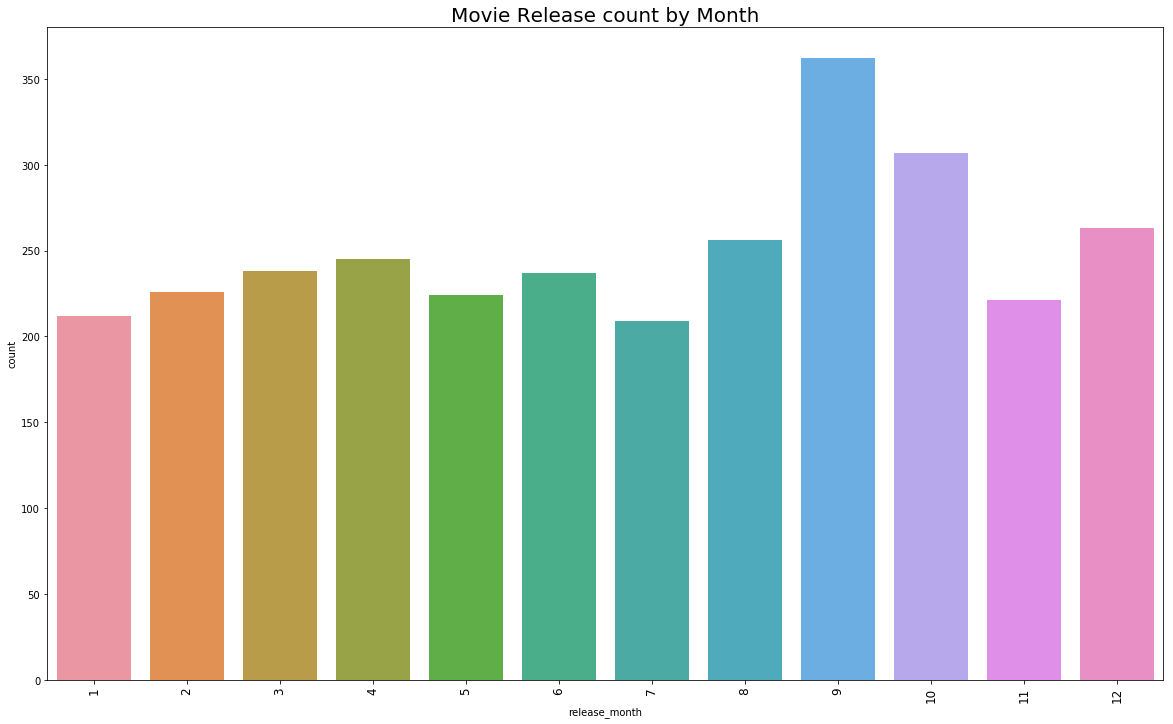

In [39]:
plt.figure(figsize=(20,12))
sns.countplot(train_df['release_month'].sort_values())
plt.title("Movie Release count by Month", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

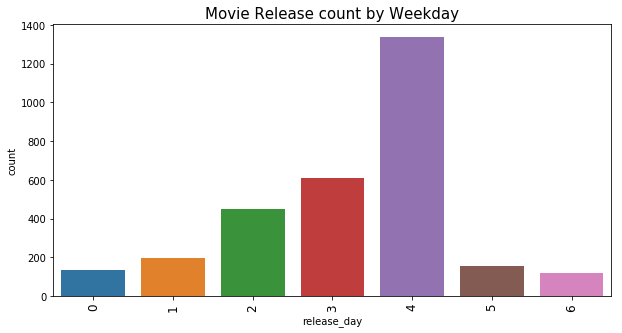

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(train_df['release_day'].sort_values())
plt.title("Movie Release count by Weekday", fontsize=15)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

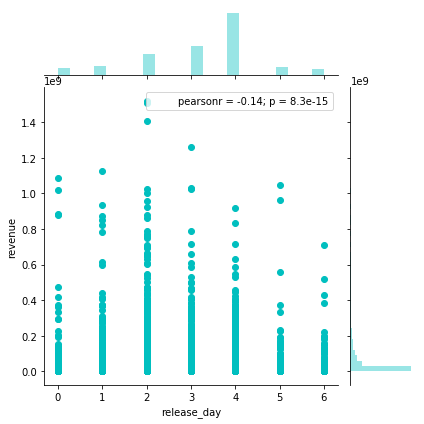

In [53]:
sns.jointplot(x="release_day", y="revenue", data=train_df, ratio=4, color="c")
plt.show()

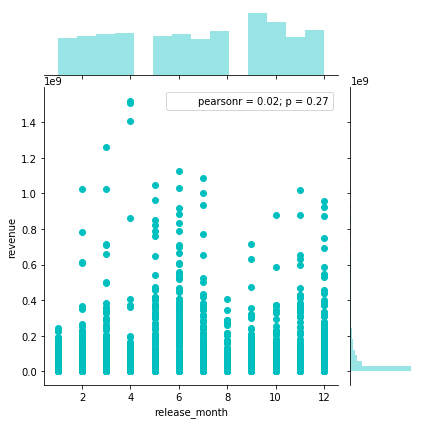

In [54]:
sns.jointplot(x="release_month", y="revenue", data=train_df, ratio=4, color="c")
plt.show()

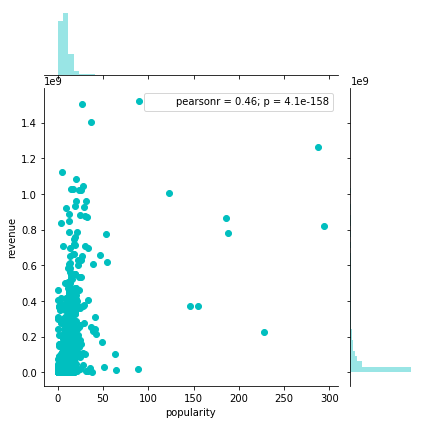

In [56]:
sns.jointplot(x="popularity", y="revenue", data=train_df, ratio=4, color="c")
plt.show()

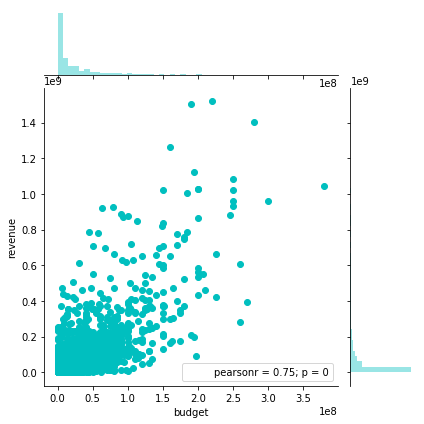

In [57]:
sns.jointplot(x="budget", y="revenue", data=train_df, ratio=4, color="c")
plt.show()

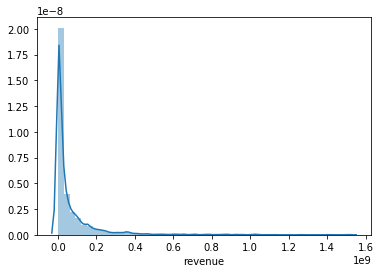

In [55]:
sns.distplot(train_df['revenue'])

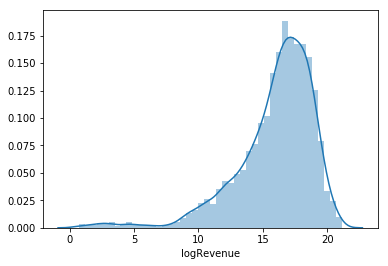

In [66]:
train_df['logRevenue'] = np.log1p(train_df['revenue'])
sns.distplot(train_df['logRevenue'])

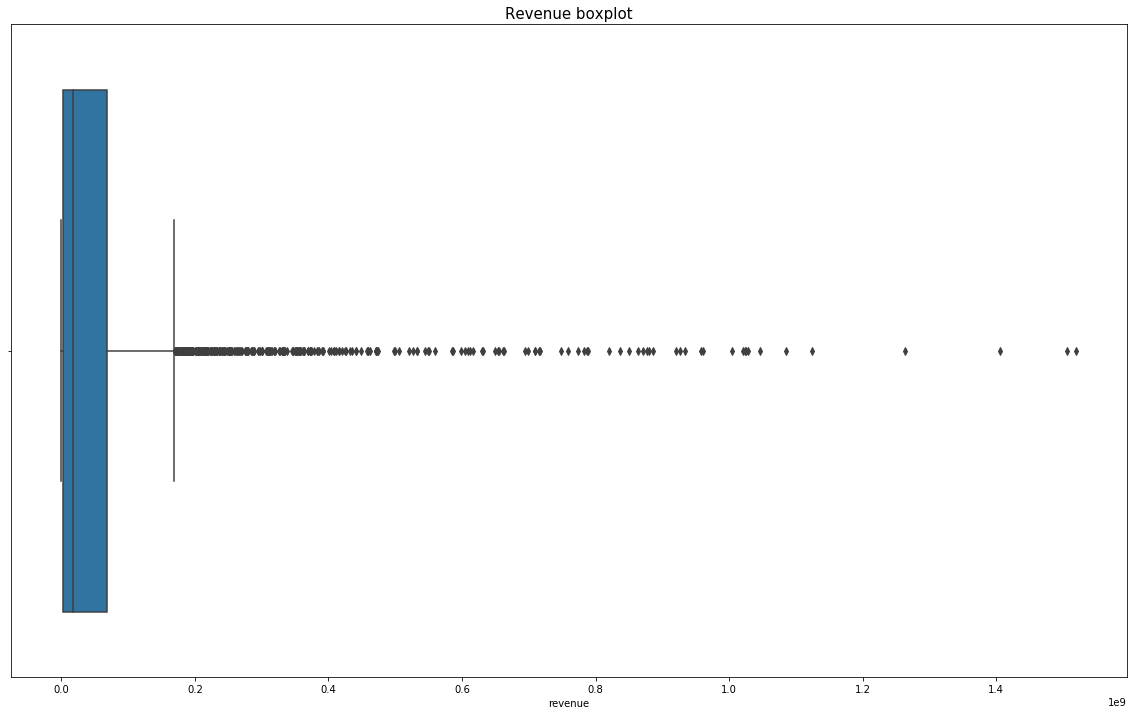

In [60]:
plt.figure(figsize=(20,12))
plt.title("Revenue boxplot", fontsize=15)
sns.boxplot(train_df['revenue'])
plt.show()

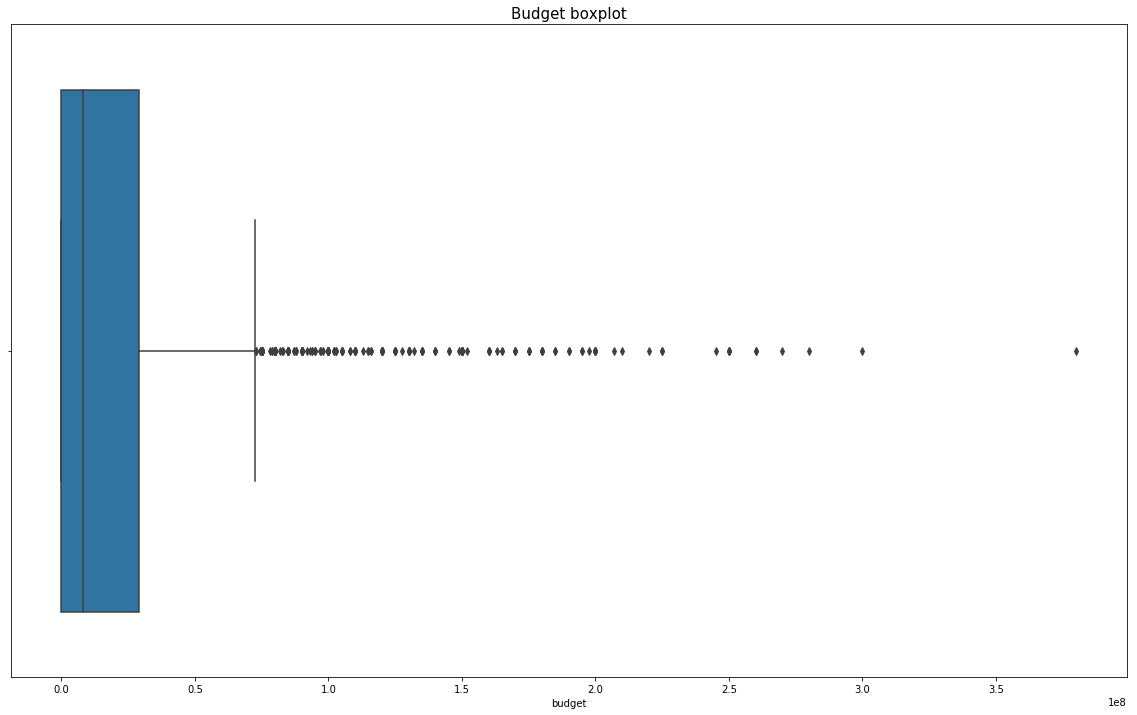

In [61]:
plt.figure(figsize=(20,12))
plt.title("Budget boxplot", fontsize=15)
sns.boxplot(train_df['budget'])
plt.show()

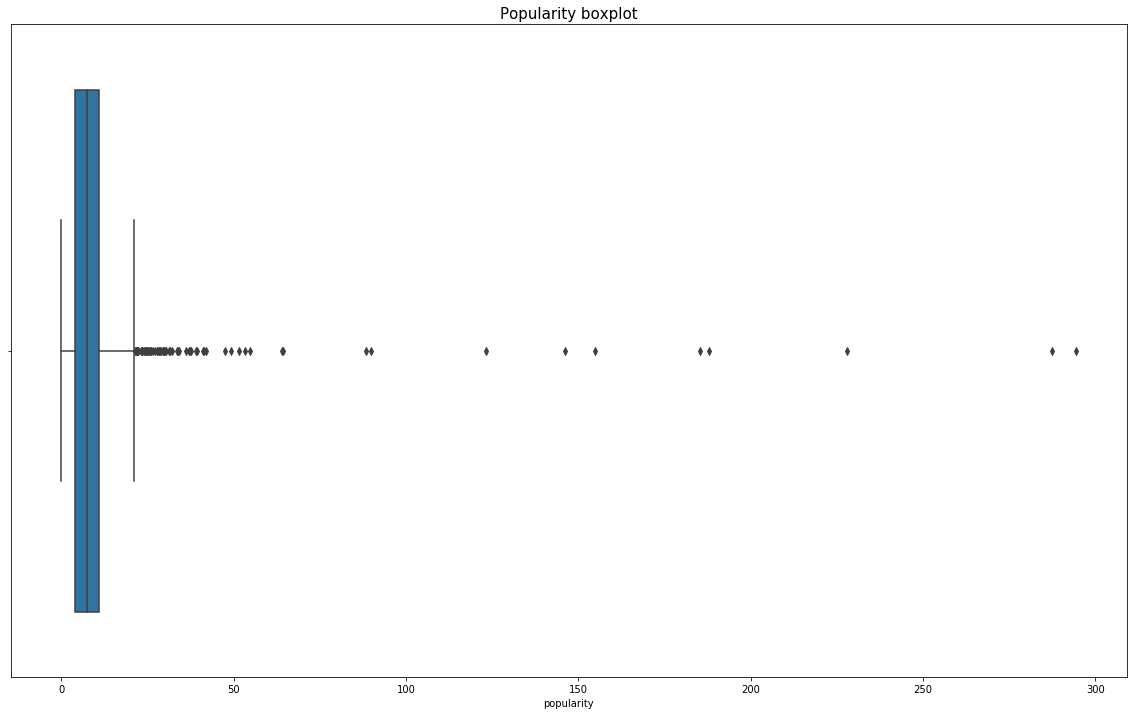

In [62]:
plt.figure(figsize=(20,12))
plt.title("Popularity boxplot", fontsize=15)
sns.boxplot(train_df['popularity'])
plt.show()

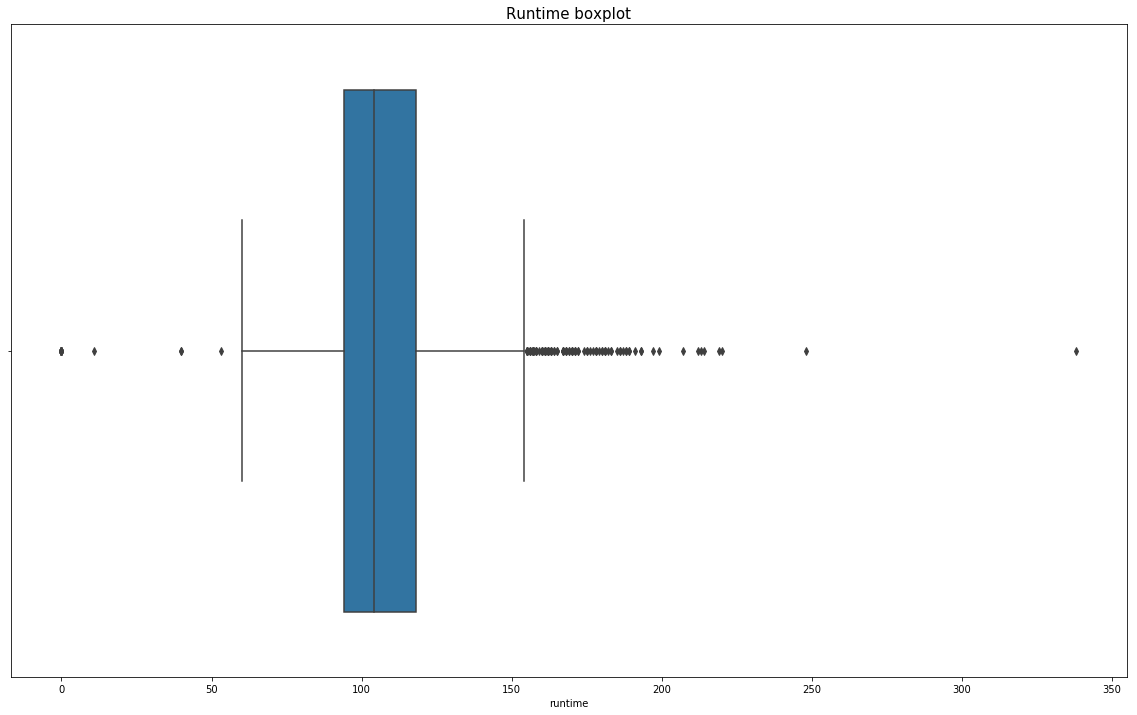

In [63]:
plt.figure(figsize=(20,12))
plt.title("Runtime boxplot", fontsize=15)
sns.boxplot(train_df['runtime'])
plt.show()

In [67]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [79]:
train_df['genres'] = train_df['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = train_df.genres.str.get_dummies(sep=',')
train_df = pd.concat([train_df, genres], axis=1)

In [81]:
train_df['genres'].value_counts()

Drama                                                    266
Comedy                                                   186
Drama,Romance                                            127
Comedy,Drama                                             114
Comedy,Drama,Romance                                     110
Comedy,Romance                                            98
Drama,Thriller                                            55
Horror,Thriller                                           54
Crime,Drama,Thriller                                      53
Crime,Drama                                               46
Documentary                                               44
Action,Crime,Thriller                                     42
Action,Crime,Drama,Thriller                               40
Action,Drama,Thriller                                     33
Horror                                                    31
Drama,History                                             31
Action,Comedy           